In [418]:
import pandas as pd
import io
import numpy as np
import re
import pickle
import nltk
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [353]:
from google.colab import files
uploaded = files.upload()

Saving train-v2.tsv to train-v2 (6).tsv


In [354]:
train_df= pd.read_csv(io.BytesIO(uploaded['train-v2.tsv']), sep='\t',header=None)
train_df

,0,1
0,0,@USER @USER a sicrhau bod mwy o arian poced 'd...
1,1,Parti Dolig da gyda tim swyddfa canolog @USER ...
2,0,@USER yeaah ma fe yn wir. ( oh well.
3,1,@USER hahaha idk. 3am oedd y bws ti?
4,0,@USER dwim yn gal llun ohoni?
...,...,...
78604,1,"@USER @USER diolch yn fawr am ein diweddaru, r..."
78605,1,@USER @USER @USER diolch! Digon o opsiynne felly!
78606,0,mor hungover heddiw 🔫
78607,1,"@USER eidiaaaal, awni dydd llun nesa ia? Y air..."


In [355]:
train_df.rename(columns={0: 'Target', 1: 'Text'}, inplace=True)
train_df

,Target,Text
0,0,@USER @USER a sicrhau bod mwy o arian poced 'd...
1,1,Parti Dolig da gyda tim swyddfa canolog @USER ...
2,0,@USER yeaah ma fe yn wir. ( oh well.
3,1,@USER hahaha idk. 3am oedd y bws ti?
4,0,@USER dwim yn gal llun ohoni?
...,...,...
78604,1,"@USER @USER diolch yn fawr am ein diweddaru, r..."
78605,1,@USER @USER @USER diolch! Digon o opsiynne felly!
78606,0,mor hungover heddiw 🔫
78607,1,"@USER eidiaaaal, awni dydd llun nesa ia? Y air..."


In [356]:
train_df.shape

(78609, 2)

In [357]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78609 entries, 0 to 78608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  78609 non-null  int64 
 1   Text    78609 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [358]:
train_df.describe()

,Target
count,78609.000000
mean,0.500312
std,0.500003
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [359]:
train_df.dtypes

Target     int64
Text      object
dtype: object

In [360]:
np.sum(train_df.isnull().any(axis=1))

0

In [361]:
train_df['Target'].unique()

array([0, 1])

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

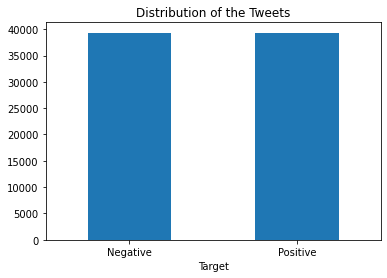

In [362]:
# Plotting the distribution of the dataset.
ax = train_df.groupby('Target').count().plot(kind='bar', title='Distribution of the Tweets',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [363]:
# Storing data in lists.
target, text = list(train_df['Target']), list(train_df['Text'])

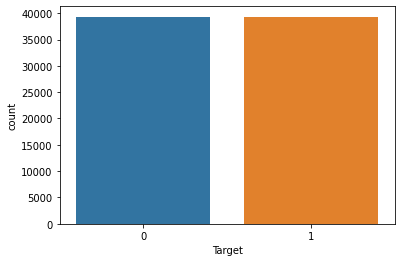

In [364]:
import seaborn as sns
sns.countplot(x='Target', data=train_df)

Data Preprocessing

In [365]:
df_positive = train_df[train_df['Target'] == 1]
df_negative = train_df[train_df['Target'] == 0]

In [366]:
pos_list=list(df_positive['Text'])
neg_list=list(df_negative['Text'])

In [367]:
username=['@USER']

In [368]:
#This piece of code was taken from https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in username])
df_positive['Text'] = df_positive['Text'].apply(lambda text: cleaning_stopwords(text))
df_positive['Text'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1     Parti Dolig da gyda tim swyddfa canolog Ty Gwy...
3                        hahaha idk. 3am oedd y bws ti?
6          Diolch! Dweud wrtho Manon fi wedi txto hi! x
8     mor browd, fe fyddai yn dangos ti faint mor aw...
10    ond paid a meiddio darllen y tweet yma allan a...
Name: Text, dtype: object

In [369]:
df_positive

,Target,Text
1,1,Parti Dolig da gyda tim swyddfa canolog Ty Gwy...
3,1,hahaha idk. 3am oedd y bws ti?
6,1,Diolch! Dweud wrtho Manon fi wedi txto hi! x
8,1,"mor browd, fe fyddai yn dangos ti faint mor aw..."
10,1,ond paid a meiddio darllen y tweet yma allan a...
...,...,...
78602,1,Be ddiawl ma yn wisgo?!
78603,1,Newyddion ffug 😉 #yagym {URL}
78604,1,"diolch yn fawr am ein diweddaru, rôn i'n amau ..."
78605,1,diolch! Digon o opsiynne felly!


In [370]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in username])
df_negative['Text'] = df_negative['Text'].apply(lambda text: cleaning_stopwords(text))
df_negative['Text'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    a sicrhau bod mwy o arian poced 'da ti, nes i ...
2                       yeaah ma fe yn wir. ( oh well.
4                              dwim yn gal llun ohoni?
5    desparate housewives! Dadla be di gora heno, g...
7    mar boy yn hymian o nappies. Dwim isho siarad ...
Name: Text, dtype: object

In [371]:
df_negative

,Target,Text
0,0,"a sicrhau bod mwy o arian poced 'da ti, nes i ..."
2,0,yeaah ma fe yn wir. ( oh well.
4,0,dwim yn gal llun ohoni?
5,0,"desparate housewives! Dadla be di gora heno, g..."
7,0,mar boy yn hymian o nappies. Dwim isho siarad ...
...,...,...
78596,0,fina fyd! ti'n sgol fory? sgenai'm mynadd o gw...
78597,0,"all white wash, a playsuit gwyn fo tiny bit o ..."
78601,0,Cymryd un fi lawr fory
78606,0,mor hungover heddiw 🔫


In [372]:
punct_list=string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punct_list)
    return text.translate(translator)
df_positive['Text']= df_positive['Text'].apply(lambda x: cleaning_punctuations(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [373]:
df_positive

,Target,Text
1,1,Parti Dolig da gyda tim swyddfa canolog Ty Gwy...
3,1,hahaha idk 3am oedd y bws ti
6,1,Diolch Dweud wrtho Manon fi wedi txto hi x
8,1,mor browd fe fyddai yn dangos ti faint mor awe...
10,1,ond paid a meiddio darllen y tweet yma allan a...
...,...,...
78602,1,Be ddiawl ma yn wisgo
78603,1,Newyddion ffug 😉 yagym URL
78604,1,diolch yn fawr am ein diweddaru rôn in amau ni...
78605,1,diolch Digon o opsiynne felly


In [374]:
punct_list=string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punct_list)
    return text.translate(translator)
df_negative['Text']= df_negative['Text'].apply(lambda x: cleaning_punctuations(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [375]:
df_negative

,Target,Text
0,0,a sicrhau bod mwy o arian poced da ti nes i fe...
2,0,yeaah ma fe yn wir oh well
4,0,dwim yn gal llun ohoni
5,0,desparate housewives Dadla be di gora heno gwe...
7,0,mar boy yn hymian o nappies Dwim isho siarad e...
...,...,...
78596,0,fina fyd tin sgol fory sgenaim mynadd o gwbwl de
78597,0,all white wash a playsuit gwyn fo tiny bit o p...
78601,0,Cymryd un fi lawr fory
78606,0,mor hungover heddiw 🔫


In [376]:
df_positive = df_positive.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [377]:
df_negative = df_negative.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [378]:
pos_list=list(df_positive['Text'])
neg_list=list(df_positive['Text'])

In [379]:
df_positive['Text'] = df_positive['Text'].str.replace('\n', '')
df_positive['Text'] = df_positive['Text'].str.replace('\t', ' ')
df_positive['Text'] = df_positive['Text'].str.replace(' {2,}', ' ', regex=True)
df_positive['Text'] = df_positive['Text'].str.strip()
df_negative['Text'] = df_negative['Text'].str.replace('\n', ' ')
df_negative['Text'] = df_negative['Text'].str.replace('\t', ' ')
df_negative['Text'] = df_negative['Text'].str.replace(' {2,}', ' ', regex=True)
df_negative['Text'] = df_negative['Text'].str.strip()

In [380]:
df_positive['Text'] = df_positive['Text'].drop_duplicates()
df_negative['Text'] = df_negative['Text'].drop_duplicates()

In [381]:
df_positive['Text'] = df_positive['Text'].str.lower()
df_negative['Text'] = df_negative['Text'].str.lower()

In [399]:
combine_df=pd.concat([df_positive, df_negative])

In [400]:
combine_df=combine_df.fillna('')

In [401]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r'\w+')
#applying regexptokenize to both training and test sets
combine_df['Text']=combine_df['Text'].apply(regexp.tokenize)

In [402]:
combine_df

,Target,Text
1,1,"[parti, dolig, da, gyda, tim, swyddfa, canolog..."
3,1,"[hahaha, idk, 3am, oedd, y, bws, ti]"
6,1,"[diolch, dweud, wrtho, manon, fi, wedi, txto, ..."
8,1,"[mor, browd, fe, fyddai, yn, dangos, ti, faint..."
10,1,"[ond, paid, a, meiddio, darllen, y, tweet, yma..."
...,...,...
78596,0,"[fina, fyd, tin, sgol, fory, sgenaim, mynadd, ..."
78597,0,"[all, white, wash, a, playsuit, gwyn, fo, tiny..."
78601,0,"[cymryd, un, fi, lawr, fory]"
78606,0,"[mor, hungover, heddiw]"


In [403]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
combine_df['Text']= combine_df['Text'].apply(lambda x: stemming_on_text(x))
combine_df['Text'].head()

1     [parti, dolig, da, gyda, tim, swyddfa, canolog...
3                  [hahaha, idk, 3am, oedd, y, bws, ti]
6     [diolch, dweud, wrtho, manon, fi, wedi, txto, ...
8     [mor, browd, fe, fyddai, yn, dangos, ti, faint...
10    [ond, paid, a, meiddio, darllen, y, tweet, yma...
Name: Text, dtype: object

In [408]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [409]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
combine_df['Text'] = combine_df['Text'].apply(lambda x: lemmatizer_on_text(x))
combine_df['Text'].head()

1     [parti, dolig, da, gyda, tim, swyddfa, canolog...
3                  [hahaha, idk, 3am, oedd, y, bws, ti]
6     [diolch, dweud, wrtho, manon, fi, wedi, txto, ...
8     [mor, browd, fe, fyddai, yn, dangos, ti, faint...
10    [ond, paid, a, meiddio, darllen, y, tweet, yma...
Name: Text, dtype: object

In [427]:
X=combine_df['Text']
y=combine_df['Target']

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [425]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)



AttributeError: ignored